In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['font.size']=12
plt.rcParams['axes.titlesize']=15
plt.rcParams['axes.labelsize']=13

df=pd.read_csv("round1_2.csv")

In [4]:
teams=['Norway', 'Iceland', 'Switzerland', 'Finland']
summary=[]
for team in teams:
    home=df[df["HomeTeam"]==team]
    away=df[df["AwayTeam"]==team]
    goals_against=away['HomeGoals'].sum()+home['AwayGoals'].sum()
    saves=home['HomeSaves'].sum()+away['AwayGoals'].sum()
    xGOT=home['HxGOTfaced'].sum()+away['AxGOTfaced'].sum()
    goals_prevented=home['HGoalsprevented'].sum()+away['AGoalsprevented'].sum()
    
    avg_goals_against=goals_against/2
    avg_saves=saves/2
    avg_xGOT=xGOT/2
    avg_goals_prevented=goals_prevented/2
    summary.append([team, avg_goals_against, avg_saves, avg_xGOT, avg_goals_prevented])
    

In [5]:
def_df=pd.DataFrame(summary, columns=["Team", "GoalsConceded", "Saves", "xGOTFaced", "GoalsPrevented"])
def_df.set_index("Team", inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

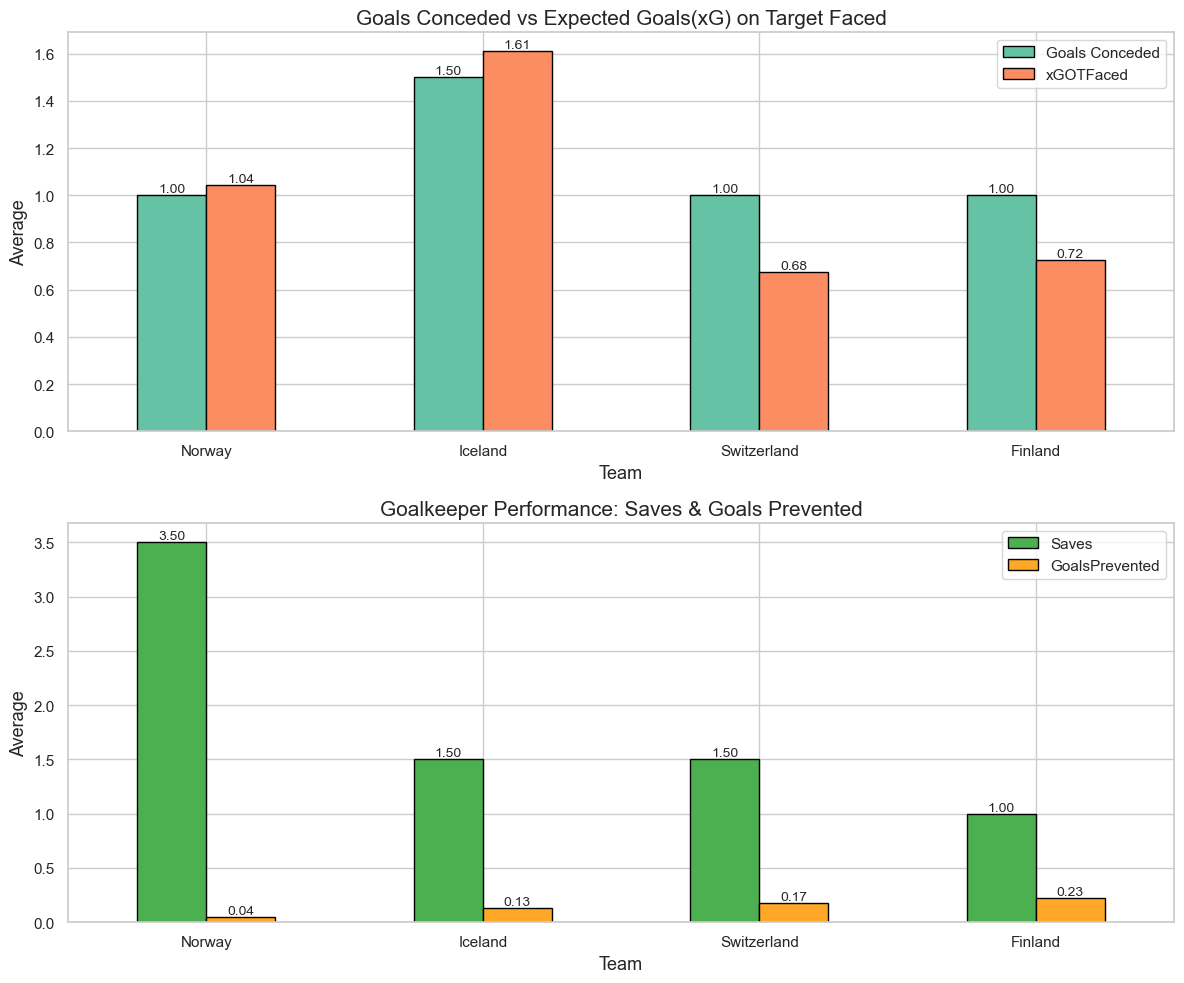

In [6]:
colors1=sns.color_palette("Set2")
colors2=["#4CAF50", "#FFA726"]

fig, axes=plt.subplots(2, 1, figsize=(12, 10))

ax1=def_df[["GoalsConceded", "xGOTFaced"]].plot(kind="bar", ax=axes[0], color=colors1[:2], edgecolor='black')
axes[0].set_title("Goals Conceded vs Expected Goals(xG) on Target Faced")
axes[0].set_ylabel("Average")
axes[0].legend(["Goals Conceded", "xGOTFaced"])
axes[0].set_xticklabels(def_df.index, rotation=0)

for container in ax1.containers:
    ax1.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

ax2=def_df[["Saves", "GoalsPrevented"]].plot(kind="bar", ax=axes[1], color=colors2, edgecolor='black')
axes[1].set_title("Goalkeeper Performance: Saves & Goals Prevented")
axes[1].set_ylabel("Average")
axes[1].legend(["Saves", "GoalsPrevented"])
axes[1].set_xticklabels(def_df.index, rotation=0)

for container in ax2.containers:
    ax2.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.tight_layout()
plt.show

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['font.size']=12
plt.rcParams['axes.titlesize']=15
plt.rcParams['axes.labelsize']=13

df=pd.read_csv("round1_2.csv")
teams=['Norway', 'Iceland', 'Switzerland', 'Finland']
summary=[]
for team in teams:
    home=df[df["HomeTeam"]==team]
    away=df[df["AwayTeam"]==team]
    goals=home['HomeGoals'].sum()+away['AwayGoals'].sum()
    xG=home['HomexG'].sum()+away['AwayxG'].sum()
    matches=len(home)+len(away)
    
    avg_goals=goals/matches if matches >0 else 0
    avg_xG=xG/matches if matches >0 else 0
    
    summary.append([team, avg_goals, avg_xG])
    

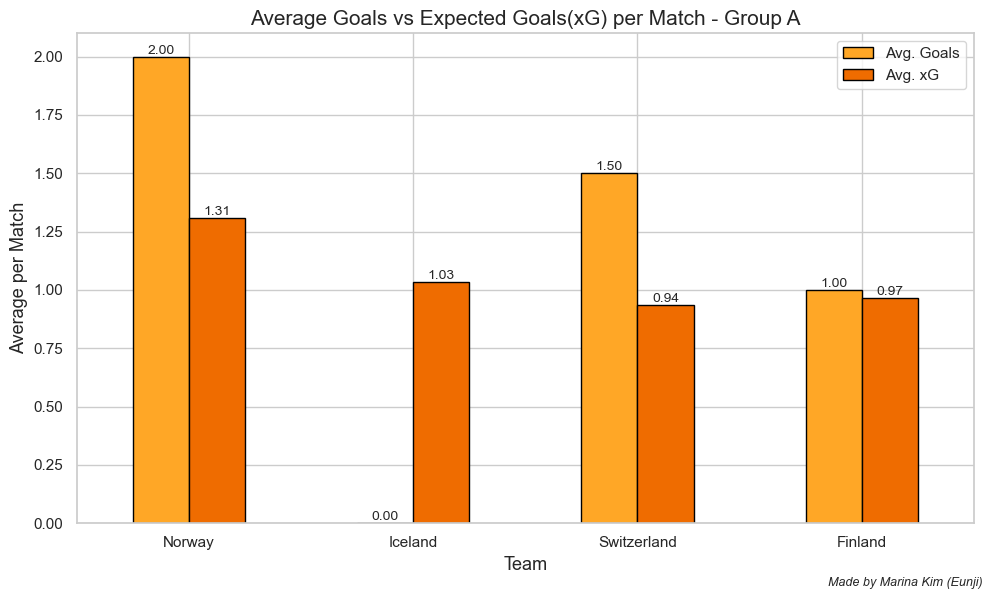

In [29]:
df_summary=pd.DataFrame(summary, columns=["Team", "AvgGoals", "AvgxG"])
df_summary.set_index("Team", inplace=True)

colors=["#FFA726", "#EF6C00"]

fig, ax = plt.subplots(figsize=(10, 6))

bars=df_summary.plot(kind="bar", ax=ax, color=colors, edgecolor='black')
ax.set_title("Average Goals vs Expected Goals(xG) per Match - Group A")
ax.set_ylabel("Average per Match")
ax.set_xlabel("Team")
ax.legend(["Avg. Goals", "Avg. xG"])
ax.set_xticklabels(df_summary.index, rotation=0)

for container in bars.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.figtext(0.99, 0.01, "Made by Marina Kim (Eunji)", horizontalalignment='right', fontsize=9, style='italic')

plt.tight_layout()
plt.show()